# Multiple Linear Regression

<hr>

## Importing packages and reading the data ##

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("../datasets/cars.csv")

## Explore the Data

In [19]:
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<hr>

**Linear** Regression is best suited for working with **numerical data**, so we will cut down our data to just the numerical fields (also removing ID).


In [22]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [7]:
# select numerical columns only

cars = df.select_dtypes(include=['float64', 'int64'])
cars.drop(columns=['ID', 'symboling'], inplace=True) # drop ID & symboling columns

In [23]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.6 KB


In [24]:
cars.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 30 data points per independent variable

A general rule when making predictions is that you require a minimium of 30 data points per independent variable.

So, in this case, we have 205 data points, which would equate to a maximum of 6 independent variables for a model (205 / 30 = 6.83)

In [25]:
cars.shape

(205, 14)

## Correlation ##
For our linear regression we need to look at the strength of the relationships between variables.

In [11]:
correlation = cars.corr()

correlation

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


Use the correlation matrix to find the variables which have the strongest influence on price.

In [29]:
corr_matrix = cars.corr().abs()

filtered_matrix = corr_matrix[corr_matrix > 0.8]

filtered_matrix

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carlength,0.874587,1.000000,0.841118,NaN,0.877728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carwidth,NaN,0.841118,1.000000,NaN,0.867032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carheight,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curbweight,NaN,0.877728,0.867032,NaN,1.000000,0.850594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.835305
enginesize,NaN,NaN,NaN,NaN,0.850594,1.000000,NaN,NaN,NaN,0.809769,NaN,NaN,NaN,0.874145
boreratio,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
compressionratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
horsepower,NaN,NaN,NaN,NaN,NaN,0.809769,NaN,NaN,NaN,1.000000,NaN,0.801456,NaN,0.808139


### Reduce dataset to most strongly correlating with `price`

We can see that they are `curbweight`, `enginesize` and `horsepower`

In [37]:
cars = cars[['curbweight', 'enginesize', 'horsepower', 'price']]

cars.head()

,curbweight,enginesize,horsepower,price
0,2548,130,111,13495.0
1,2548,130,111,16500.0
2,2823,152,154,16500.0
3,2337,109,102,13950.0
4,2824,136,115,17450.0


Text(0, 0.5, 'Price')

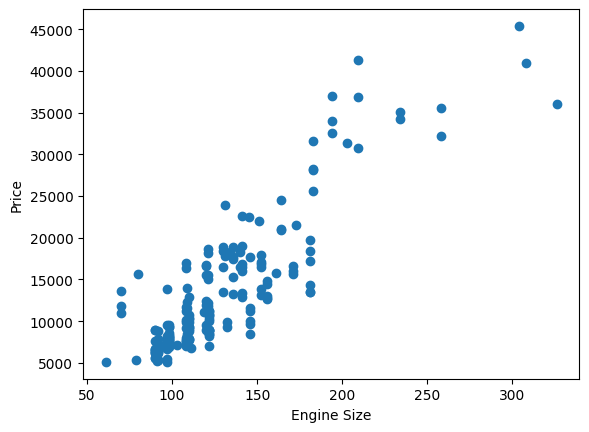

In [27]:
plt.scatter(cars['enginesize'], cars['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

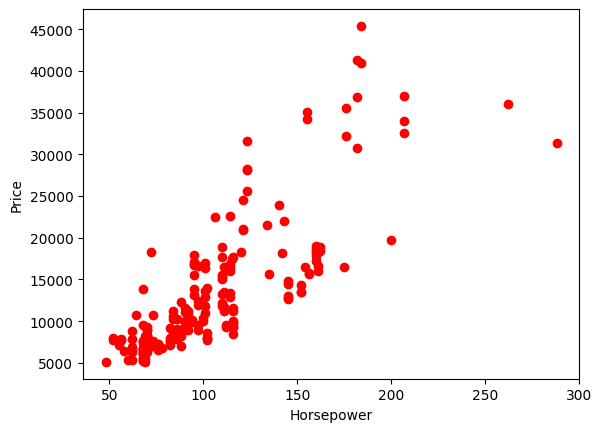

In [32]:
plt.scatter(cars['horsepower'], cars['price'], color='red')
plt.xlabel('Horsepower')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

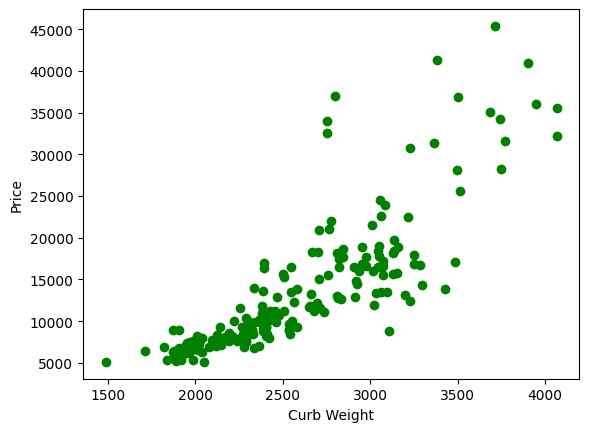

In [33]:
plt.scatter(cars['curbweight'], cars['price'], color='green')
plt.xlabel('Curb Weight')
plt.ylabel('Price')

### Heatmap and Pairplot to visualise correlations

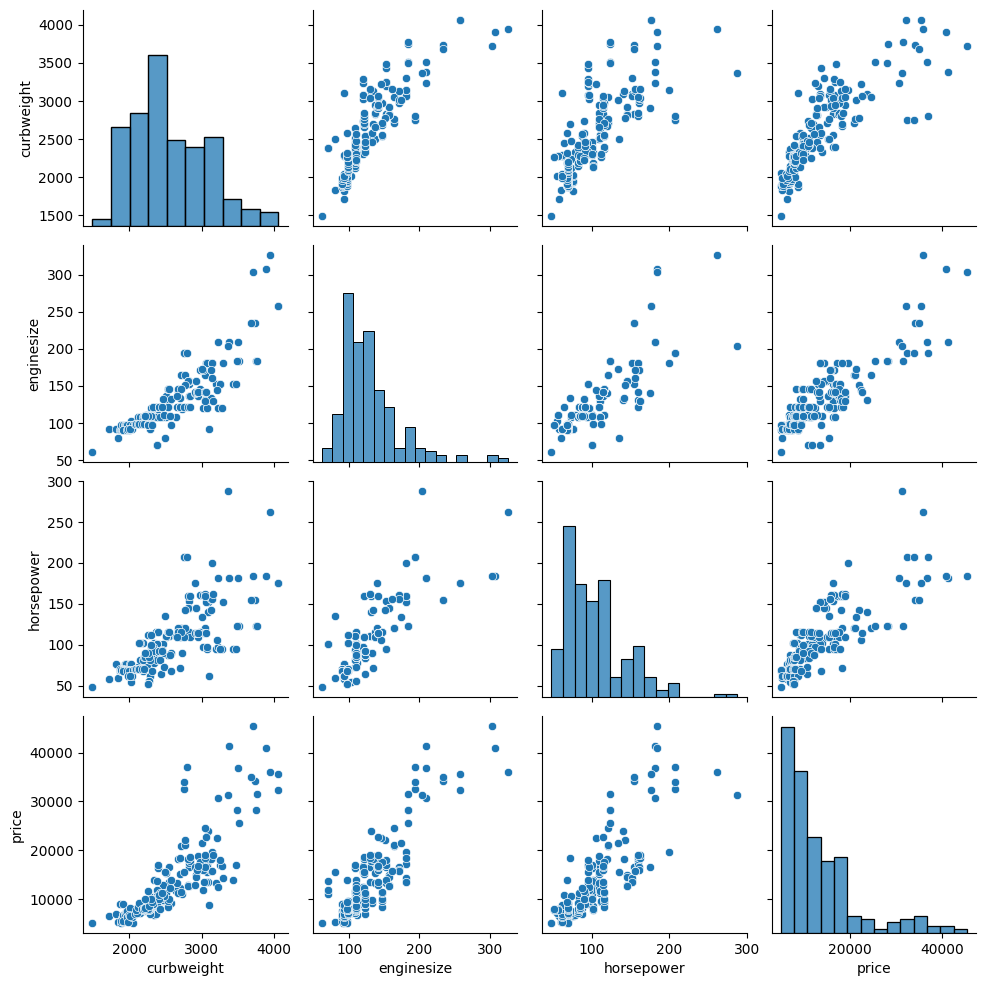

In [34]:
sns.pairplot(cars)

<Axes: >

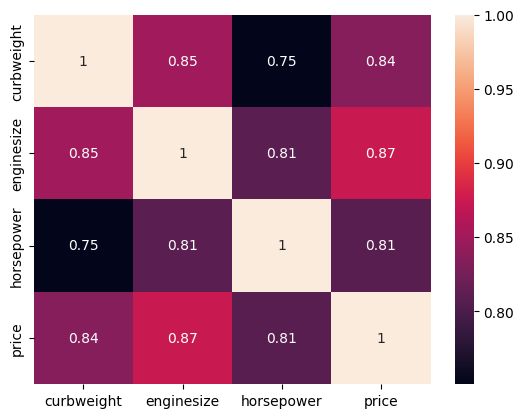

In [39]:
sns.heatmap(cars.corr(), annot=True)

## Split the DataFrame into train and test data

In [40]:
train, test = train_test_split(
    cars,
    random_state = 13
)

In [41]:
train.shape

(153, 4)

In [42]:
test.shape

(52, 4)

## Train the model

In [43]:
dependent_var = train['price']
independent_var = train[['enginesize', 'horsepower', 'curbweight']]
independent_var = sm.add_constant(independent_var)

model = sm.OLS(
    dependent_var,
    independent_var
).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     254.9
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.91e-58
Time:                        11:41:13   Log-Likelihood:                -1454.3
No. Observations:                 153   AIC:                             2917.
Df Residuals:                     149   BIC:                             2929.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.449e+04   1557.954     -9.304      0.000   -1.76e+04   -1.14e+04
enginesize    79.7892     12.842      6.213      0.000      54.413     105.165
horsepower    38.9095     11.688      3.329      0.001      15.814      62.005
curbweight     5.3085      1.087      4.883      0.000       3.160       7.457
==============================================================================
Omnibus:                       22.457   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.253
Skew:                           0.670   Prob(JB):                     4.05e-10
Kurtosis:                       5.233   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking for Collinearity

Investigate correlation between independent variables to check for collinearity.

When two independent variables are strongly correlated (over 0.9), this indicates collinearity and likely one of the variables may be removed from the model.

In [47]:
cars.corr()

,curbweight,enginesize,horsepower,price
curbweight,1.000000,0.850594,0.750739,0.835305
enginesize,0.850594,1.000000,0.809769,0.874145
horsepower,0.750739,0.809769,1.000000,0.808139
price,0.835305,0.874145,0.808139,1.000000


enginesize and curbweight are highly correlated, so try removing curbweight (which is less correlated with price) and input into model again.

In [50]:
cars = cars[['enginesize', 'horsepower', 'price']]

train, test = train_test_split(
    cars,
    random_state = 13
)

dependent_var = train['price']
independent_var = train[['enginesize', 'horsepower']]
independent_var = sm.add_constant(independent_var)

model = sm.OLS(
    dependent_var,
    independent_var
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     321.4
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           5.87e-55
Time:                        11:44:39   Log-Likelihood:                -1465.7
No. Observations:                 153   AIC:                             2937.
Df Residuals:                     150   BIC:                             2946.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8012.8548    875.372     -9.154      0.000   -9742.506   -6283.203
enginesize   118.1750     10.901     10.841      0.000      96.636     139.714
horsepower    59.6110     11.692      5.098      0.000      36.509      82.713
==============================================================================
Omnibus:                       13.654   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.582
Skew:                           0.464   Prob(JB):                     2.06e-05
Kurtosis:                       4.589   Cond. No.                         527.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
predicted = model.predict(
    sm.add_constant(test[['enginesize','horsepower']])
)

predicted

104    22914.591169
90      7437.780585
23      9648.623476
143    10353.485693
171    16155.579736
150     6555.132304
65     15684.973587
114    15612.798489
33      7389.686630
101    22437.702983
189    10233.216640
30      6316.688211
70     20945.333389
172    16155.579736
95      7563.284668
134    12843.537589
106    22914.591169
193    10113.994594
108    15612.798489
163     7741.070732
177    11888.714211
132    12843.537589
68     20945.333389
7      14616.163193
128    27252.584786
89      7563.284668
127    27252.584786
102    22437.702983
84     19066.049813
110    15612.798489
79      9648.623476
100    11950.419246
116    15612.798489
118     6676.448363
10     10770.762856
94      7563.284668
13     18580.785577
42     10947.501913
15     27534.934809
124    19066.049813
200    15445.482488
111    11831.197200
96      7563.284668
151     6555.132304
158     8324.616890
97      7563.284668
115    11950.419246
69     20945.333389
145    11366.873089
148     9638.153414


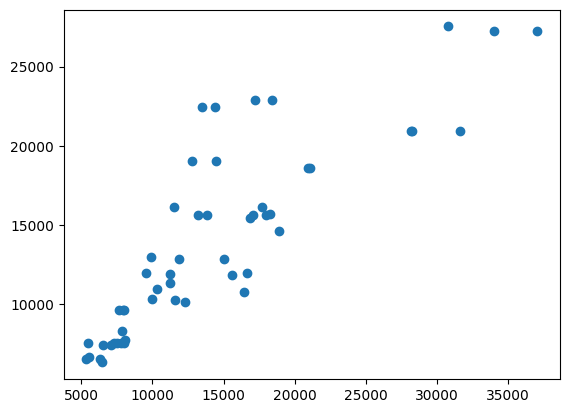

In [52]:
plt.scatter(test['price'], predicted)

In [53]:
metrics.r2_score(test['price'], predicted)

0.7296016413553965

## Variable Inflation Factor (VIF)

Another measure of collinearity to be aware of.

```python
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = independent_variables.columns
vif["VIF"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

print(vif)

# drop the columns where the VIF value is above 10 (considered severe)